### Name : Shreya Dikshit
### Roll no. : 22
### Practical 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## 1.Consider a dataset of power consumption containing (4 rows and 3 column). Take first two column as input and last column as output and print it accordingly. (data is attached herewith.)

In [2]:
d = {'Outside Temperature':[10,5.0,4.5,6.0],'Persons in room':[2,42,31,35],'Power Requirement':[0.5,2.5,2.2,1.8]}
dataset = pd.DataFrame(d)
dataset

,Outside Temperature,Persons in room,Power Requirement
0,10.0,2,0.5
1,5.0,42,2.5
2,4.5,31,2.2
3,6.0,35,1.8


## 2. Reshape the input data to for computing multivariate regression coefficient by appending 1 Print the reshape input data.

In [3]:
X = dataset.drop('Power Requirement', axis=1).values
Y = dataset['Power Requirement'].values
X

array([[10. ,  2. ],
       [ 5. , 42. ],
       [ 4.5, 31. ],
       [ 6. , 35. ]])

In [4]:
def reshape_features(x):
    x.reshape(-1,1)
    ones = np.ones(shape=x.shape[0]).reshape(-1,1)
    return np.concatenate((ones,x),1)

In [5]:
X = reshape_features(X)
X

array([[ 1. , 10. ,  2. ],
       [ 1. ,  5. , 42. ],
       [ 1. ,  4.5, 31. ],
       [ 1. ,  6. , 35. ]])

## 3.Define the function for computing the regression coefficients. Print out the coefficients.

In [6]:
def find_coeffs(X,Y):
    return np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)
coefficients = find_coeffs(X,Y)
print("coefficients:",coefficients)

coefficients: [ 2.49761588 -0.20751687  0.02092015]


## 4.Define the function for computing energy consumption for given regression coefficients and new input data.

In [7]:
def predicting(X):
    b0 = coefficients[0]
    other_coefficients= coefficients[1:]
    pred = b0
    for xi,bi in zip(X,other_coefficients):
        pred+=(bi*xi)
    return pred

In [8]:
predicting([10,2])

0.46428747352347693

## 5.Print the energy consumed for given data (temp=7.5, #person=131). Try with 3 more new values of temp and person.

In [9]:
print(predicting([7.5,131]))


3.681779222698337


In [10]:
print(predicting([10,23]))

0.9036106595734146


In [11]:
print(predicting([2,10]))

2.291783655977564


## 6. Create your own random data containing (10 rows and 3 columns) for predicting the computer system price. (first column for Ram capacity (in GB), second column for Hard disk capacity (in GB) and third column for price of computer (in Rs)). Print the data.

In [12]:
f ={'RamCapacity':[8,16,4,2,6,8,16,2,16,4],
    'HardDiskCapacity':[20,14,15,20,16,12,15,18,20,22],
    'Price':[20000,40000,50000,30000,20000,30000,20000,10000,45000,34000]
    
}
fset = pd.DataFrame(f)
fset

,RamCapacity,HardDiskCapacity,Price
0,8,20,20000
1,16,14,40000
2,4,15,50000
3,2,20,30000
4,6,16,20000
5,8,12,30000
6,16,15,20000
7,2,18,10000
8,16,20,45000
9,4,22,34000


## 7. Define the function for computing multivariate regression coefficient for give data (computer price prediction). Print out the coefficients. 

In [13]:
X = fset.drop('Price',axis=1).values
Y = fset['Price'].values

In [14]:
def reshape_(x):
    x.reshape(-1,1)
    ones = np.ones(shape=x.shape[0]).reshape(-1,1)
    return np.concatenate((ones,x),1)


In [15]:

def find_coeff_(X,Y):
    return np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)

X = reshape_(X)
coeffs = find_coeff_(X,Y)
print(coeffs)

[24803.9660404    553.51396083    32.39648144]


## 8. Predict the price of computer for different values of RAM & HD in (GB). Print the output (Price of computer) for three unknown pair of RAM & HD.

In [16]:
def pred_(X):
    b0 = coeffs[0]
    other_coeffs = coeffs[1:]
    pred = b0
    for xi,bi in zip(X,other_coeffs):
        pred+=(bi*xi)
    return pred

print(pred_([8,20]))
print(pred_([4,20]))
print(pred_([16,14]))

29880.0073558707
27665.951512550753
34113.740153860075


## 9.Read the insur-2d.csv file using Pandas library. Print the head values. Print the column values. Print the length of data.

In [17]:
data = pd.read_csv('./data/insur-2d.csv')
data.head()

,108,392,5
0,19,46,2
1,13,15,7
2,124,422,2
3,40,119,4
4,57,170,9


In [18]:
print("Columns of data:",data.columns)
print("Length of the data:",data.shape[0])

Columns of data: Index(['108', '392', '5'], dtype='object')
Length of the data: 62


## 10.Compute the multivariate regression coefficient for given csv file data. Print the coefficients.

In [31]:
X = data.drop('5',axis=1).values
Y = data['5'].values

In [32]:
def find_coeff(X,Y):
    return np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)

In [33]:
x = reshape_features(X)
coeff = find_coeff(x,Y)
print("Coefficients:",coeff)

Coefficients: [ 5.35320784  0.0210913  -0.00781811]


## 11.Predict the three outputs for unknown three pair of inputs.  

In [34]:
def predict(X):
    b0 = coeff[0]
    other_coeff = coeff[1:]
    pred = b0
    for xi,bi in zip(X,other_coeff):
        pred+=(bi*xi)
    return pred

In [50]:
predy = []
for i in range(len(X)):
    predy.append(predict(X[i]))

In [23]:
print(predict(X[1]))
print(predict([1.,100.,400.]))
X[0]

5.510123071260105
4.592488104022897


array([19, 46])

In [24]:
print(predict([124,422]))

4.669286308998233


## 12.Print the 3D plot for given data of csv file using multivariate regression coefficients by fitting the hyperplane.


In [25]:
Y =Y.reshape(-1,1)
Y.shape

(62, 1)

Text(0.5, 0.92, '3d plot')

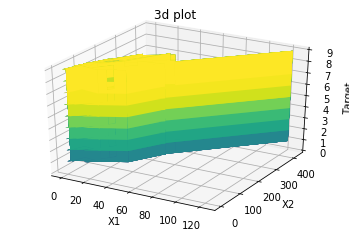

In [26]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(data['108'], data['392'],Y,cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Target')
ax.set_title('3d plot')

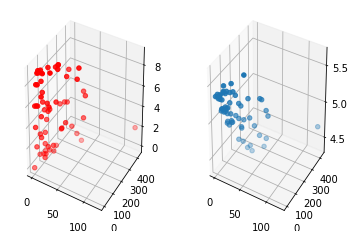

In [55]:
fig = plt.figure()
ax = fig.add_subplot(121,projection='3d')
ax.scatter(data['108'],data['392'],Y,color='r')
ax = fig.add_subplot(122,projection='3d')
ax.scatter(data['108'],data['392'],predy)